In [1]:
import empiricaldist
from statadict import parse_stata_dict

In [2]:
dict_file='GSS.dct'
data_file='GSS.dat.gz'

In [3]:
stata_dict=parse_stata_dict(dict_file)

In [4]:
import gzip
fp=gzip.open(data_file)

In [5]:
import pandas as pd
gss=pd.read_fwf(fp,names=stata_dict.names,colspecs=stata_dict.colspecs)
print(gss.shape)
print(gss.head())

(64814, 8)
   YEAR  ID_  AGE  EDUC  SEX  GUNLAW  GRASS  REALINC
0  1972    1   23    16    2       1      0  18951.0
1  1972    2   70    10    1       1      0  24366.0
2  1972    3   48    12    2       1      0  24366.0
3  1972    4   27    17    2       1      0  30458.0
4  1972    5   61    12    2       1      0  50763.0


In [6]:
print(gss['EDUC'].value_counts().sort_index())

0       165
1        47
2       152
3       257
4       319
5       402
6       828
7       879
8      2724
9      2083
10     2880
11     3743
12    19663
13     5360
14     7160
15     2910
16     8355
17     1967
18     2384
19      920
20     1439
98       73
99      104
Name: EDUC, dtype: int64


In [7]:
import numpy as np
educ=gss['EDUC'].replace([98,99],np.nan)
print(educ.value_counts().sort_index())

0.0       165
1.0        47
2.0       152
3.0       257
4.0       319
5.0       402
6.0       828
7.0       879
8.0      2724
9.0      2083
10.0     2880
11.0     3743
12.0    19663
13.0     5360
14.0     7160
15.0     2910
16.0     8355
17.0     1967
18.0     2384
19.0      920
20.0     1439
Name: EDUC, dtype: int64


In [8]:
import matplotlib.pyplot as plt


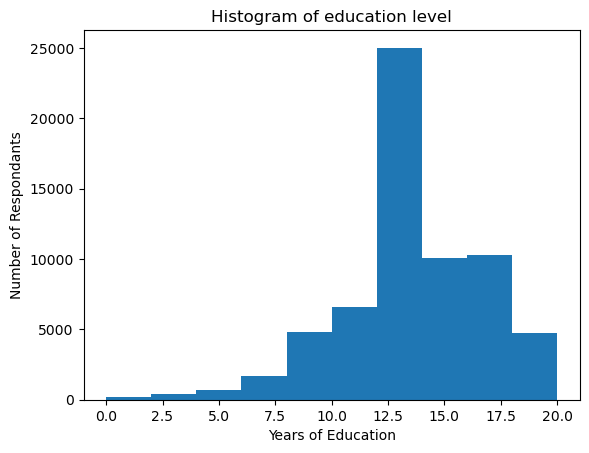

In [9]:
educ.hist(grid=False)
plt.xlabel('Years of Education')
plt.ylabel('Number of Respondants')
plt.title('Histogram of education level');
plt.show()

In [10]:
from empiricaldist import Pmf
pmf_educ=Pmf.from_seq(educ,normalize=False)
print(type(pmf_educ))
print(pmf_educ.head())
print(pmf_educ.tail())
print(pmf_educ[20])

<class 'empiricaldist.empiricaldist.Pmf'>
0.0    165
1.0     47
2.0    152
Name: , dtype: int64
18.0    2384
19.0     920
20.0    1439
Name: , dtype: int64
1439


In [11]:
pmf_educ_norm=Pmf.from_seq(educ,normalize=True)
print(pmf_educ_norm.head())
print(pmf_educ_norm[12])

0.0    0.002553
1.0    0.000727
2.0    0.002352
Name: , dtype: float64
0.30420656899299164


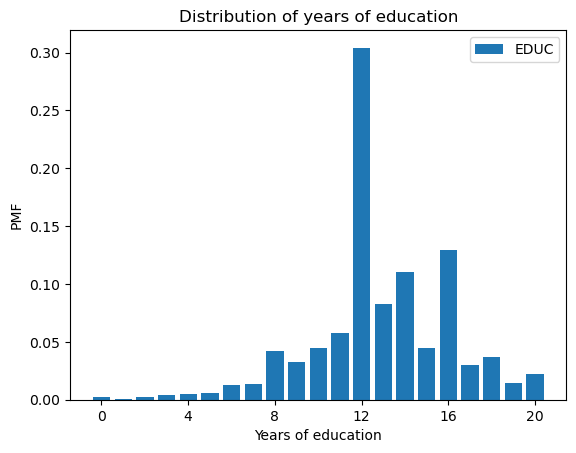

In [12]:
pmf_educ_norm.bar(label='EDUC')
plt.xlabel('Years of education')
plt.xticks(range(0,21,4))
plt.ylabel("PMF")
plt.title("Distribution of years of education")
plt.legend();
plt.show()

In [13]:
print(gss['YEAR'].value_counts().sort_index())

1972    1613
1973    1504
1974    1484
1975    1490
1976    1499
1977    1530
1978    1532
1980    1468
1982    1860
1983    1599
1984    1473
1985    1534
1986    1470
1987    1819
1988    1481
1989    1537
1990    1372
1991    1517
1993    1606
1994    2992
1996    2904
1998    2832
2000    2817
2002    2765
2004    2812
2006    4510
2008    2023
2010    2044
2012    1974
2014    2538
2016    2867
2018    2348
Name: YEAR, dtype: int64


In [14]:
import numpy as np
year=gss['YEAR'].replace([98,99],np.nan)
print(year.value_counts().sort_index())

1972    1613
1973    1504
1974    1484
1975    1490
1976    1499
1977    1530
1978    1532
1980    1468
1982    1860
1983    1599
1984    1473
1985    1534
1986    1470
1987    1819
1988    1481
1989    1537
1990    1372
1991    1517
1993    1606
1994    2992
1996    2904
1998    2832
2000    2817
2002    2765
2004    2812
2006    4510
2008    2023
2010    2044
2012    1974
2014    2538
2016    2867
2018    2348
Name: YEAR, dtype: int64


In [15]:
from empiricaldist import Pmf
pmf_year=Pmf.from_seq(year,normalize=False)
print(type(pmf_year))
print(pmf_year.head())
print(pmf_year.tail())
print(pmf_year[2018])

<class 'empiricaldist.empiricaldist.Pmf'>
1972    1613
1973    1504
1974    1484
Name: , dtype: int64
2014    2538
2016    2867
2018    2348
Name: , dtype: int64
2348


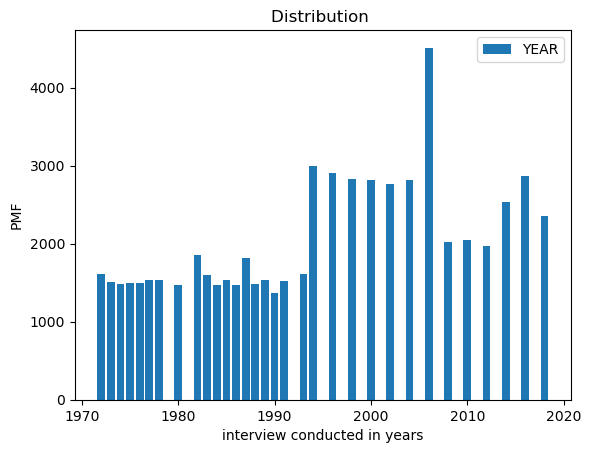

In [16]:
pmf_year.bar(label='YEAR')
plt.xlabel('interview conducted in years')

plt.ylabel("PMF")
plt.title("Distribution ")
plt.legend();
plt.show()

In [17]:
from empiricaldist import Pmf
pmf_year_norm=Pmf.from_seq(year,normalize=True)
print(type(pmf_year))
print(pmf_year.head())
print(pmf_year.tail())
print(pmf_year[2018])

<class 'empiricaldist.empiricaldist.Pmf'>
1972    1613
1973    1504
1974    1484
Name: , dtype: int64
2014    2538
2016    2867
2018    2348
Name: , dtype: int64
2348


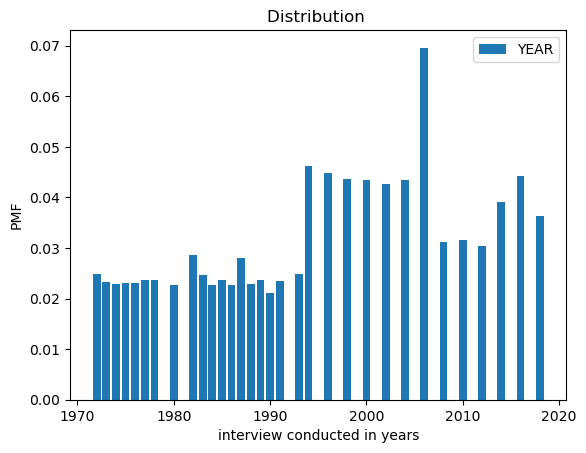

In [18]:
pmf_year_norm.bar(label='YEAR')
plt.xlabel('interview conducted in years')

plt.ylabel("PMF")
plt.title("Distribution ")
plt.legend();
plt.show()

In [19]:
from empiricaldist import Cdf

In [20]:
age=gss["AGE"].replace([98,99],np.nan)

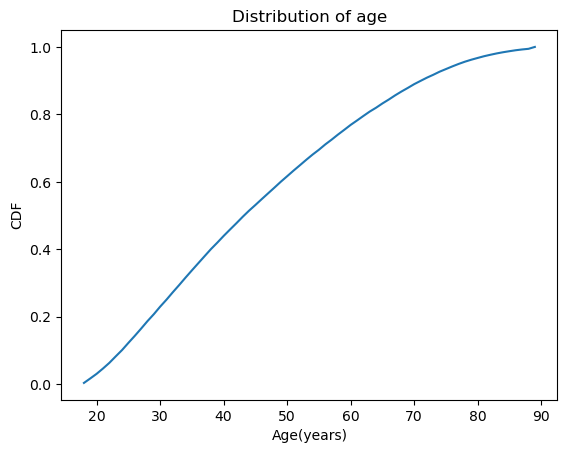

In [21]:
cdf_age=Cdf.from_seq(age)
cdf_age.plot()
plt.xlabel('Age(years)')
plt.ylabel('CDF')
plt.title('Distribution of age');
plt.show()

In [22]:
q=51
p=cdf_age(q)
print(p)

0.6331867587402843


In [23]:
#
p1=0.25
q1=cdf_age.inverse(p1)
print(q1)

31.0


In [24]:
p3=0.75
q3=cdf_age.inverse(p3)
print(q3)

59.0


In [25]:
print(q3-q1)


28.0


In [26]:
q=65
p=cdf_age(q)
print(1-p)

0.16757501625739324


In [27]:
income=gss["REALINC"].replace([98,99],np.nan)

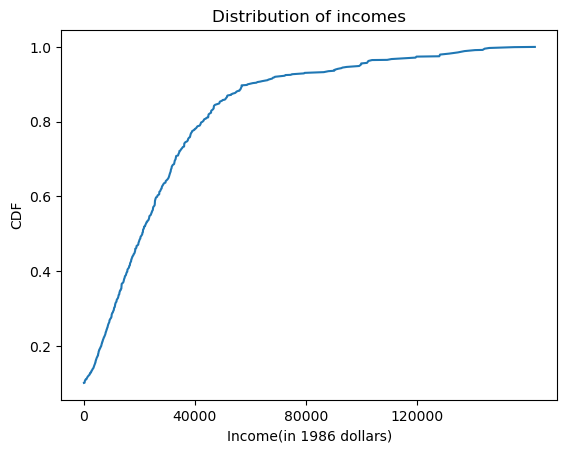

In [28]:
cdf_income=Cdf.from_seq(income)
cdf_income.plot()
plt.xlabel('Income(in 1986 dollars)')
plt.xticks(range(0,160000,40000))
plt.ylabel('CDF')
plt.title('Distribution of incomes');
plt.show()

In [29]:
male=(gss['SEX']==1)
female=(gss['SEX']==2)
male_age=age[male]
female_age=age[female]

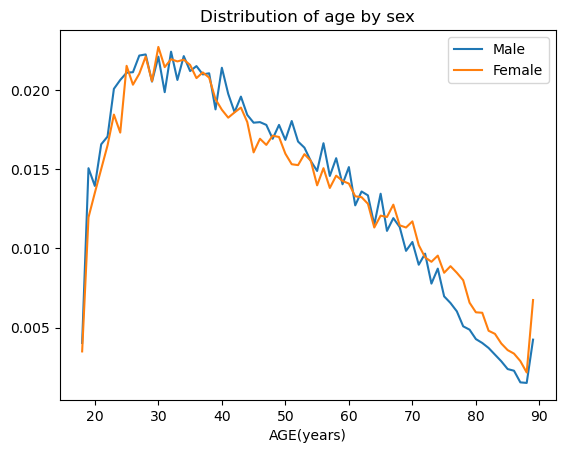

In [30]:
pmf_male_age=Pmf.from_seq(male_age)
pmf_male_age.plot(label='Male')
pmf_female_age=Pmf.from_seq(female_age)
pmf_female_age.plot(label='Female')
plt.xlabel('AGE(years)')
plt.title("Distribution of age by sex")
plt.legend();
plt.show()


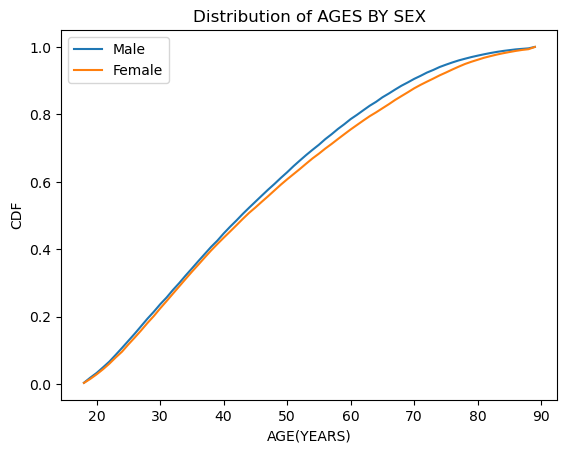

In [31]:
cdf_male_age=Cdf.from_seq(male_age)
cdf_male_age.plot(label="Male")
cdf_female_age=Cdf.from_seq(female_age)
cdf_female_age.plot(label='Female')
plt.xlabel('AGE(YEARS)')
plt.ylabel('CDF')
plt.title('Distribution of AGES BY SEX')
plt.legend();
plt.show()

In [32]:
print(cdf_male_age(60),cdf_female_age(60))

0.785999579566954 0.7552990789035623


In [33]:
print(cdf_male_age.inverse(0.5),cdf_female_age.inverse(0.5))

43.0 44.0


In [34]:
print((1-cdf_male_age(80)),(1-cdf_female_age(80)))

0.0258566323313012 0.03806458772611254


In [35]:
pre95=(gss['YEAR']<1995)
post95=(gss['YEAR']>1995)

In [36]:
income=gss['REALINC'].replace(0,np.nan)

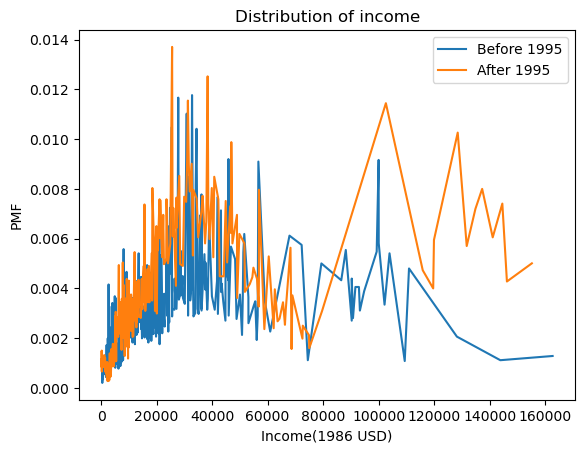

In [42]:
Pmf.from_seq(income[pre95]).plot(label='Before 1995')
Pmf.from_seq(income[post95]).plot(label='After 1995')
plt.xlabel('Income(1986 USD)')
plt.ylabel('PMF')
plt.title('Distribution of income')
plt.legend();
plt.show()

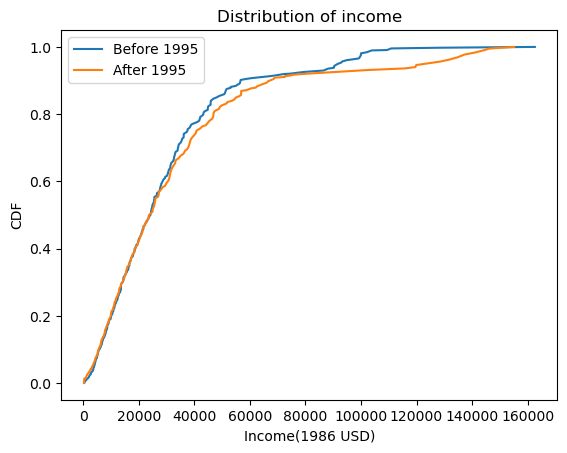

In [41]:
Cdf.from_seq(income[pre95]).plot(label='Before 1995')
Cdf.from_seq(income[post95]).plot(label='After 1995')
plt.xlabel('Income(1986 USD)')
plt.ylabel('CDF')
plt.title('Distribution of income')
plt.legend();
plt.show()

In [43]:
#Kernel density Estimation or Probability Density function (PDF)
age_data=gss['AGE']

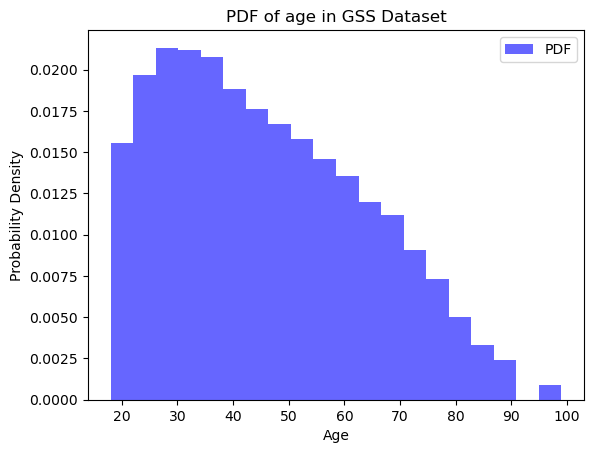

In [46]:
#Create a histogram to visualize the PDF
#Setting the dnsity parameter to true means that the histogram woll be normalized so that the area unser the histogram 
#is equal to 1. This normalization is often done when you want to 
plt.hist(age_data, bins=20, density=True, alpha=0.6, color='b',label='PDF')
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.title('PDF of age in GSS Dataset')
plt.legend();
plt.show()


In [47]:
#Corresponding PMF
pmf=age_data.value_counts(normalize=True).sort_index()

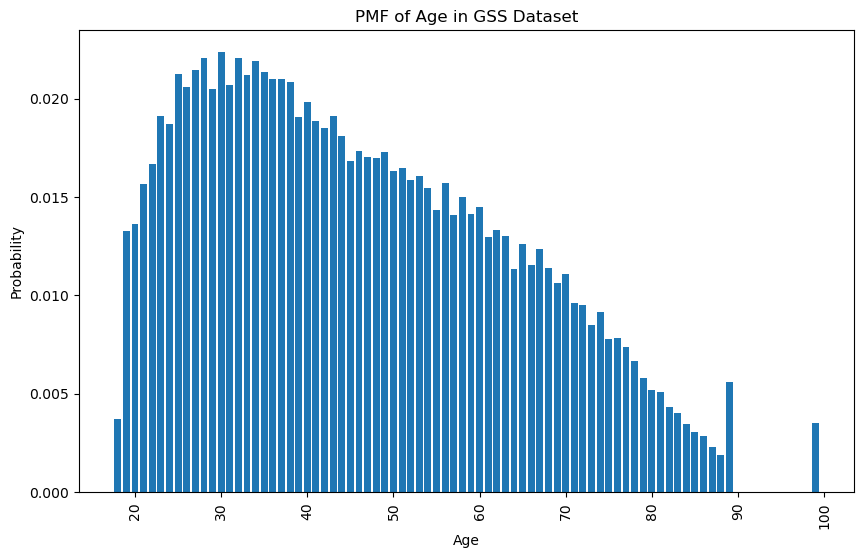

In [48]:
#Create a bar plot of the PMF
plt.figure(figsize=(10,6))
plt.bar(pmf.index,pmf.values)
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('PMF of Age in GSS Dataset')
plt.xticks(rotation=90)
plt.show()